In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
import numpy as np

In [ ]:
df = pd.read_csv('non_convex_data_1000.csv')
df.head()

In [ ]:
lr = LinearRegression()
gd = SGDRegressor()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df[['x']],df[['f(x)']],test_size=.2,random_state=42)


In [ ]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
plt.scatter(df['x'],df['f(x)'])
plt.plot(X_test,y_pred)
print('R2:',r2_score(y_test,y_pred))
plt.show()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df[['x']],df['f(x)'],test_size=.2,random_state=42)
gd = SGDRegressor(alpha=.01,max_iter=1000)
gd.fit(X_train,y_train)
y_pred = gd.predict(X_test)
plt.scatter(df['x'],df['f(x)'])
plt.plot(X_test,y_pred)
print('R2:',r2_score(y_test,y_pred))
plt.show()


In [ ]:
X = df['x'].to_numpy().reshape(-1,1)
y = df['f(x)'].to_numpy().reshape(-1,1)

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=2)
poly = PolynomialFeatures(degree=2)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [82]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)
y_pred = lr.predict(X_test_trans)
r2_score(y_test,y_pred)

0.9011520936211591

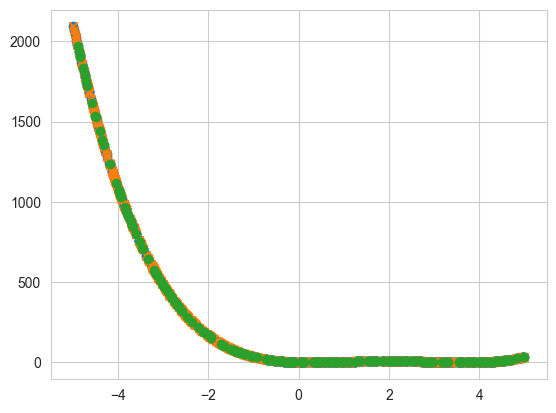

In [83]:
plt.scatter(X,y)
plt.scatter(X_train,y_train,marker='x')
plt.scatter(X_test,y_test,marker='o')

In [84]:
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_pred = lr.predict(X_range_poly)


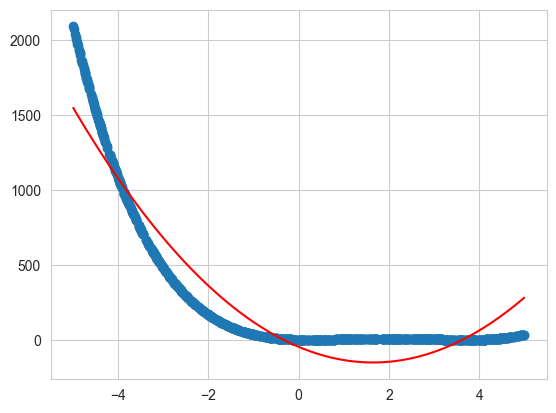

In [85]:
plt.scatter(X,y)
plt.plot(X_range,y_pred,color='r')